In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_columns', 200)

### Business Understanding

#### Latar Belakang

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman data diberikan dengan principal, maturity, dan repayment calendar yang akan memotivasi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan.

#### Ketersediaan Data

Data telah dipersiapkan oleh [Home Credit](http://www.homecredit.net/about-us.aspx).

Terdapat 7 sumber data yang berbeda pada data warehouse milik Home Credit, diantaranya:

* application_train/application_test: Data utama pelatihan dan pengujian yang berisi informasi tentang setiap pengajuan pinjaman di Home Credit. Setiap pengajuan pinjaman memiliki satu baris dan diidentifikasi oleh fitur SK_ID_CURR. Pada data pelatihan terdapat kolom TARGET yang menunjukkan apakah pinjaman telah dilunasi (0) atau tidak dilunasi (1).

* bureau: Data mengenai kredit klien sebelumnya dari lembaga keuangan lain. Setiap kredit sebelumnya memiliki satu baris di bureau, dan satu pinjaman dalam data aplikasi dapat memiliki beberapa kredit sebelumnya.

* bureau_balance: Data bulanan tentang kredit sebelumnya yang tercatat di bureau. Setiap baris mewakili satu bulan dari kredit sebelumnya, dan satu kredit sebelumnya bisa memiliki beberapa baris, satu untuk setiap bulan selama jangka waktu kredit tersebut.

* previous_application: Data tentang aplikasi pinjaman sebelumnya di Home Credit untuk klien yang saat ini memiliki pinjaman di data aplikasi. Setiap pinjaman dalam data aplikasi saat ini bisa memiliki beberapa pinjaman sebelumnya. Setiap aplikasi pinjaman sebelumnya memiliki satu baris dan diidentifikasi oleh fitur SK_ID_PREV.

* POS_CASH_BALANCE: Data bulanan tentang pinjaman-pinjaman point of sale atau tunai yang pernah dimiliki klien dengan Home Credit. Setiap baris adalah satu bulan dari pinjaman sebelumnya, dan satu pinjaman sebelumnya bisa memiliki banyak baris.

* credit_card_balance: Data bulanan tentang kartu kredit sebelumnya yang pernah dimiliki klien dengan Home Credit. Setiap baris mewakili satu bulan dari saldo kartu kredit, dan satu kartu kredit bisa memiliki banyak baris.

* installments_payment: Riwayat pembayaran untuk pinjaman sebelumnya di Home Credit. Terdapat satu baris untuk setiap pembayaran yang dilakukan dan satu baris untuk setiap pembayaran yang terlewat.

Gambar diagram ini menunjukkan relasi antara satu tabel dengan tabel lainnya:

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

Pada tugas ini, perusahaan Home Credit hanya mengarahkan untuk menggunakan tabel main application training dan testing data saja.

#### Penjelasan kolom data yang digunakan

Karena tabel data yang digunakan hanya application training dan testing, maka perlu untuk mengetahui maksud setiap kolom data yang ada, diantaranya :
* SK_ID_CURR: ID unik untuk setiap peminjam.
* TARGET: Status pelunasan pinjaman, 0 jika lunas dan 1 jika tidak lunas.
* NAME_CONTRACT_TYPE: Jenis kontrak pinjaman (Contoh: Cash loans).
* CODE_GENDER: Jenis kelamin peminjam.
* FLAG_OWN_CAR: Kepemilikan mobil oleh peminjam (Y/N).
* FLAG_OWN_REALTY: Kepemilikan properti oleh peminjam (Y/N).
* CNT_CHILDREN: Jumlah anak yang dimiliki peminjam.
* AMT_INCOME_TOTAL: Total pendapatan tahunan peminjam.
* AMT_CREDIT: Jumlah pinjaman yang diajukan.
* AMT_ANNUITY: Jumlah angsuran tahunan yang harus dibayarkan.
* AMT_GOODS_PRICE: Harga barang yang dibeli dengan pinjaman.
* NAME_TYPE_SUITE: Kategori orang yang ikut dalam pengajuan pinjaman (pasangan, anak, dll).
* NAME_INCOME_TYPE: Sumber pendapatan peminjam (karyawan, pensiunan, dll).
* NAME_EDUCATION_TYPE: Tingkat pendidikan peminjam.
* NAME_FAMILY_STATUS: Status keluarga peminjam.
* NAME_HOUSING_TYPE: Status tempat tinggal peminjam.
* REGION_POPULATION_RELATIVE: Kepadatan populasi di daerah tempat tinggal peminjam.
* DAYS_BIRTH: Usia peminjam dalam bentuk jumlah hari hidup hingga tanggal aplikasi (negatif).
* DAYS_EMPLOYED: Lama bekerja (dalam hari).
* DAYS_REGISTRATION: Lama terdaftar (dalam hari sejak registrasi).
* DAYS_ID_PUBLISH: Waktu sejak ID diterbitkan.
* OWN_CAR_AGE: Usia mobil yang dimiliki peminjam.
* FLAG_MOBIL: Apakah peminjam memiliki telepon seluler.
* FLAG_EMP_PHONE: Apakah peminjam memiliki telepon pekerjaan.
* FLAG_WORK_PHONE: Apakah peminjam memiliki telepon kerja.
* FLAG_CONT_MOBILE: Apakah telepon seluler peminjam aktif.
* FLAG_PHONE: Apakah peminjam memiliki telepon.
* FLAG_EMAIL: Apakah peminjam memiliki email.
* OCCUPATION_TYPE: Jenis pekerjaan peminjam.
* CNT_FAM_MEMBERS: Jumlah anggota keluarga peminjam.
* REGION_RATING_CLIENT: Peringkat wilayah berdasarkan risiko kredit.
* REGION_RATING_CLIENT_W_CITY: Peringkat wilayah dan kota tempat tinggal.
* WEEKDAY_APPR_PROCESS_START: Hari ketika aplikasi diajukan.
* HOUR_APPR_PROCESS_START: Jam saat aplikasi diajukan.
* REG_REGION_NOT_LIVE_REGION: Apakah wilayah aplikasi berbeda dari tempat tinggal.
* REG_REGION_NOT_WORK_REGION: Apakah wilayah aplikasi berbeda dari tempat kerja.
* LIVE_REGION_NOT_WORK_REGION: Apakah wilayah tinggal berbeda dari tempat kerja.
* REG_CITY_NOT_LIVE_CITY: Apakah kota aplikasi berbeda dari tempat tinggal.
* REG_CITY_NOT_WORK_CITY: Apakah kota aplikasi berbeda dari tempat kerja.
* LIVE_CITY_NOT_WORK_CITY: Apakah kota tempat tinggal berbeda dari tempat kerja.
* ORGANIZATION_TYPE: Jenis organisasi tempat peminjam bekerja.
* Kolom nomor 42-44. EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3: Sumber eksternal yang memberi skor risiko kredit.
* Kolom nomor 45-122. APARTMENTS_AVG hingga AMT_REQ_CREDIT_BUREAU_YEAR: Fitur properti dan riwayat kredit:
    - Properti (APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, dll): Rata-rata, modus, atau median dari berbagai karakteristik properti peminjam (seperti jumlah apartemen, luas basement, area lahan, jumlah lantai).
    - SOCIAL_CIRCLE (OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, dll): Informasi tentang lingkaran sosial peminjam terkait pinjaman, seperti jumlah orang yang memiliki tunggakan dalam 30 atau 60 hari.
    - FLAG_DOCUMENT: Indikator pengajuan dokumen tertentu oleh peminjam.
    - AMT_REQ_CREDIT_BUREAU: Jumlah permintaan informasi kredit dari biro kredit dalam periode waktu tertentu (per jam, hari, minggu, bulan, kuartal, atau tahun).

### Read data on application_train & application_test

In [216]:
df_train = pd.read_csv('https://media.githubusercontent.com/media/arawsardni/Final-Task---Home-Credit-Scorecard-Model/refs/heads/main/dataset/application_train.csv')
print("Shape of training data: ", df_train.shape)
df_train.head()

Shape of training data:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [217]:
df_test = pd.read_csv('https://media.githubusercontent.com/media/arawsardni/Final-Task---Home-Credit-Scorecard-Model/refs/heads/main/dataset/application_test.csv')
print("Shape of testing data: ", df_test.shape)
df_test.head()

Shape of testing data:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [218]:
## Import the history data of customer from another institution

bureau = pd.read_csv('https://media.githubusercontent.com/media/arawsardni/Final-Task---Home-Credit-Scorecard-Model/refs/heads/main/dataset/bureau.csv')
print("Shape of bureau data: ", bureau.shape)
bureau.head()

Shape of bureau data:  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [219]:
bureau_agg = bureau.groupby('SK_ID_CURR').last().reset_index()
bureau_agg.shape

(305811, 17)

In [220]:
bureau_agg.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,5896636,Active,currency 1,-320,0,411.0,-1328.0,NaN,0,168345.0,110281.5,0.0,0.0,Consumer credit,-10,9364.5
1,100002,6113835,Closed,currency 1,-1043,0,62.0,-967.0,0.0,0,67500.0,245781.0,0.0,0.0,Credit card,-758,0.0
2,100003,5885880,Active,currency 1,-606,0,1216.0,-621.0,0.0,0,810000.0,0.0,810000.0,0.0,Credit card,-43,NaN
3,100004,6829134,Closed,currency 1,-408,0,-382.0,-382.0,0.0,0,94537.8,0.0,0.0,0.0,Consumer credit,-382,NaN
4,100005,6735202,Active,currency 1,-62,0,122.0,-123.0,0.0,0,29826.0,25321.5,0.0,0.0,Consumer credit,-31,4261.5


### Exploratory Data Analysis

#### Distribution of Target Column on df_train

/tmp/ipython-input-982392246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=df_train, palette='Set2')


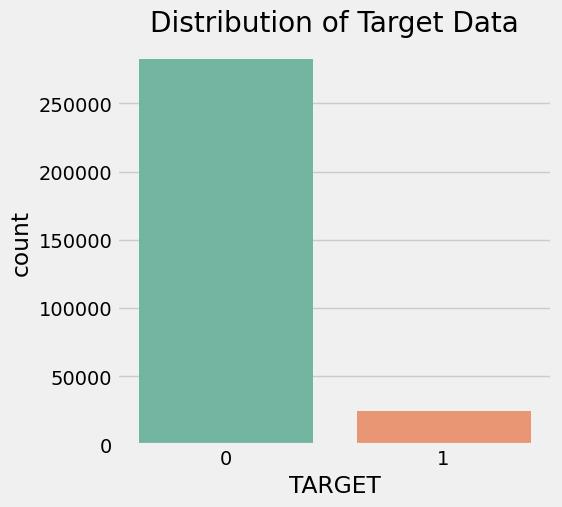

In [221]:
plt.figure(figsize=(5,5))
plt.title('Distribution of Target Data')
sns.countplot(x='TARGET', data=df_train, palette='Set2')
plt.show()

Dari visualisasi ini, bisa terlihat terdapat masalah 'imbalanced class' pada df_train

#### Missing Values

In [222]:
def missing_values_table(df):
    # Count total of missing values
    mis_val = df.isna().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # Make the table
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    new_mis_val_table = mis_val_table.rename(columns={0 : 'Missing Values', 1 : '% of Total Values'})
    new_mis_val_table = new_mis_val_table[new_mis_val_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

    # Print summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(new_mis_val_table.shape[0]) + " columns that have missing values.")

    return new_mis_val_table

In [223]:
missing_values = missing_values_table(df_train)
missing_values.head(10)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


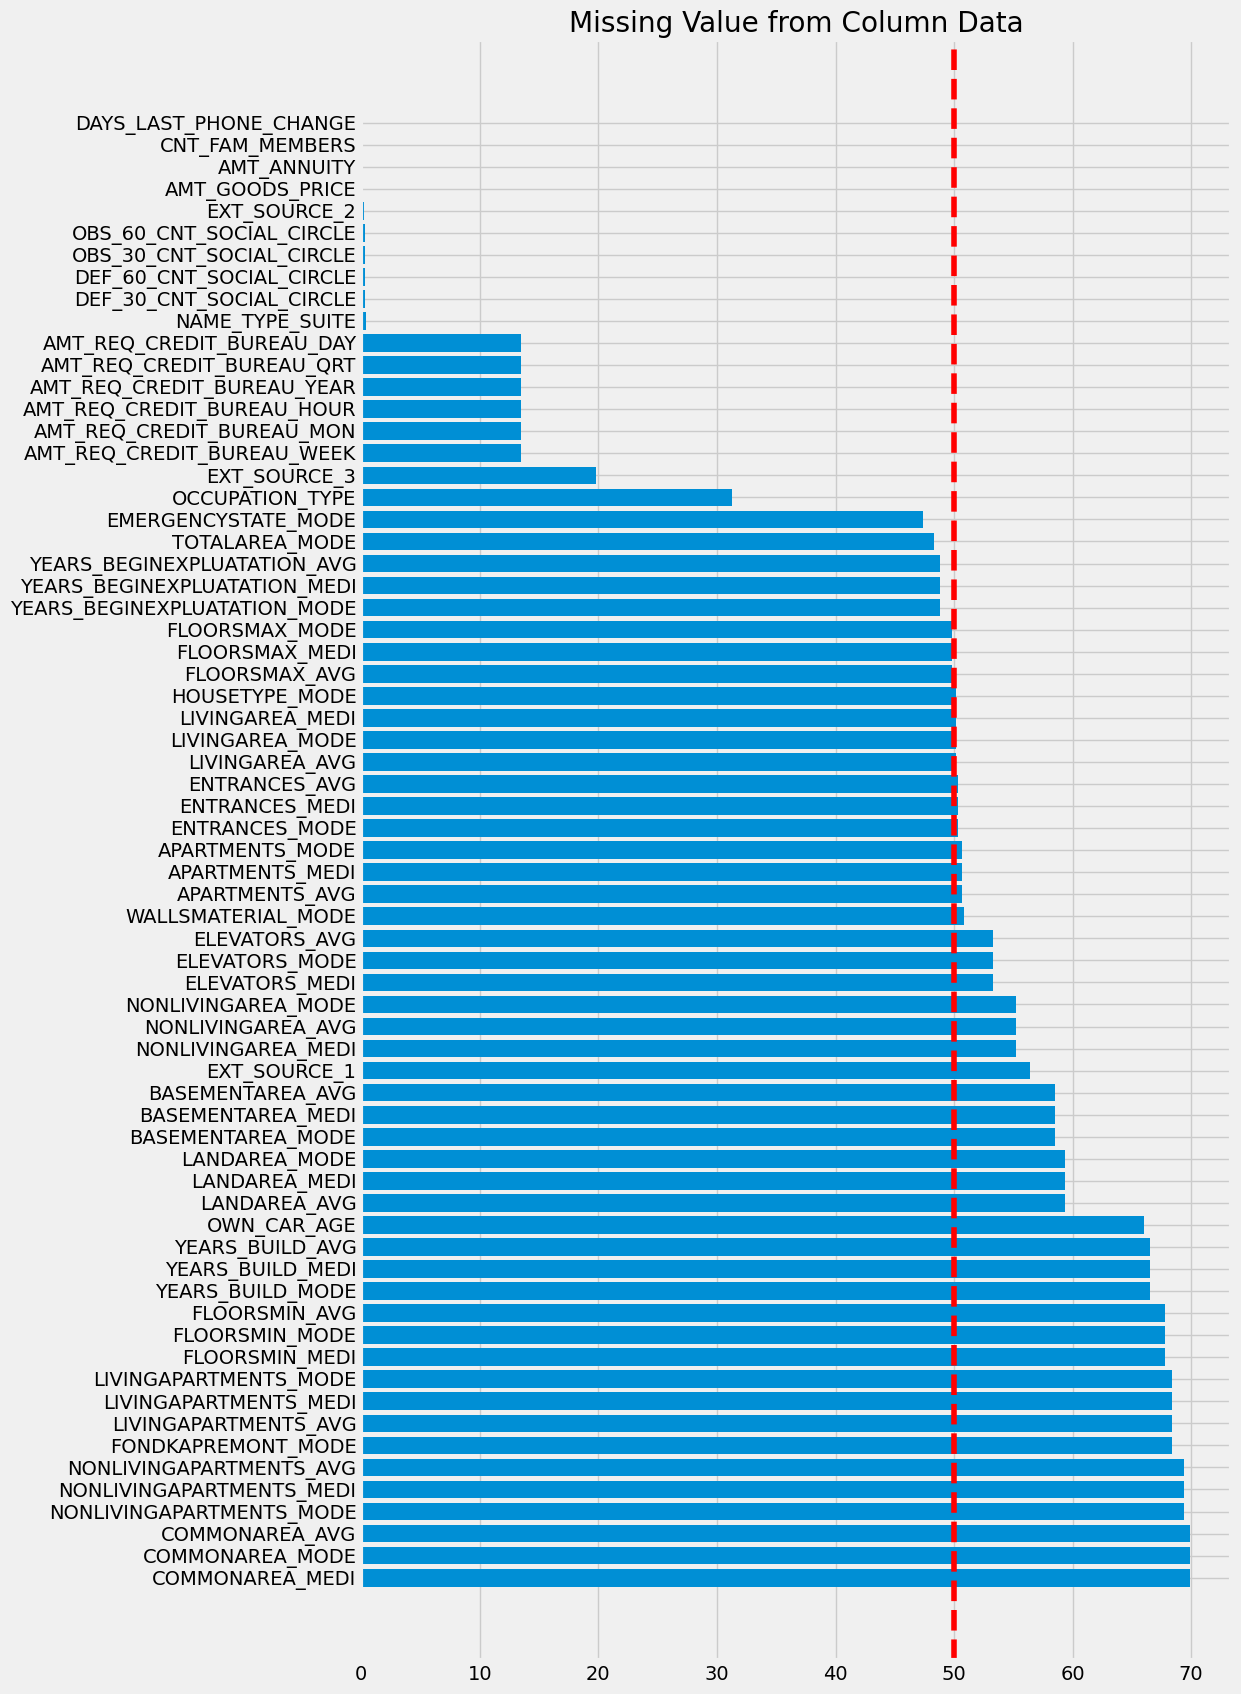

In [224]:
plt.figure(figsize=(10,20))
plt.title('Missing Value from Column Data')
plt.barh(y=missing_values.index, width=missing_values['% of Total Values'])
plt.axvline(x=50, color='r', linestyle='--', label='50% Threshold')
plt.show()

Berdasarkan visualisasi dari Missing value '% of Total Values' pada kolom df_train, hasilnya menunjukkan bahwa terdapat kolom yang Missing Valuenya lebih dari 50% (HOUSETYPE_MODE - COMMONAREA_MEDI)

#### Column Types

In [225]:
df_train.dtypes.value_counts()

,count
float64,65
int64,41
object,16


In [226]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

,0
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


In [227]:
df_train['ORGANIZATION_TYPE'].value_counts()

,count
ORGANIZATION_TYPE,
Business Entity Type 3,67992
XNA,55374
Self-employed,38412
Other,16683
Medicine,11193
Business Entity Type 2,10553
Government,10404
School,8893
Trade: type 7,7831


### Encoding Categorical Variable

#### Label Encoding

In [228]:
label_e = LabelEncoder()
label_e_count = 0

for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            label_e.fit(df_train[col])

            df_train[col] = label_e.transform(df_train[col])
            df_test[col] = label_e.transform(df_test[col])

            label_e_count += 1

print(f'{label_e_count} columns were label encoded.')

3 columns were label encoded.


#### One-hot encoding

In [229]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print("Shape of training data: ", df_train.shape)
print("Shape of testing data: ", df_test.shape)

Shape of training data:  (307511, 243)
Shape of testing data:  (48744, 239)


### Align Training and Testing Data

Kegunaan align pada training dan testing data untuk menyesuaikan jumlah kolom pada df_train terhadap df_test (jumlah kolom yang dimiliki berbeda)

In [230]:
train_labels = df_train['TARGET']

# Align training and testing data
df_train, df_test = df_train.align(df_test, join='inner', axis=1)
df_train['TARGET'] = train_labels

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### EDA Part 2

#### Anomalies

In [231]:
(df_train['DAYS_BIRTH'] / -365).describe()

,DAYS_BIRTH
count,307511.000000
mean,43.936973
std,11.956133
min,20.517808
25%,34.008219
50%,43.150685
75%,53.923288
max,69.120548


Untuk kolom 'DAYS_BIRTH', tidak terlihat indikasi adanya outlier (terlihat dari nilai min, max, 25-75%)

In [232]:
df_train['DAYS_EMPLOYED'].describe()

,DAYS_EMPLOYED
count,307511.000000
mean,63815.045904
std,141275.766519
min,-17912.000000
25%,-2760.000000
50%,-1213.000000
75%,-289.000000
max,365243.000000


Untuk kolom 'DAYS_EMPLOYED', terdapat indikasi outlier dimana nilai max dari kolom tersebut mencapai 365423 hari (1000 tahun)

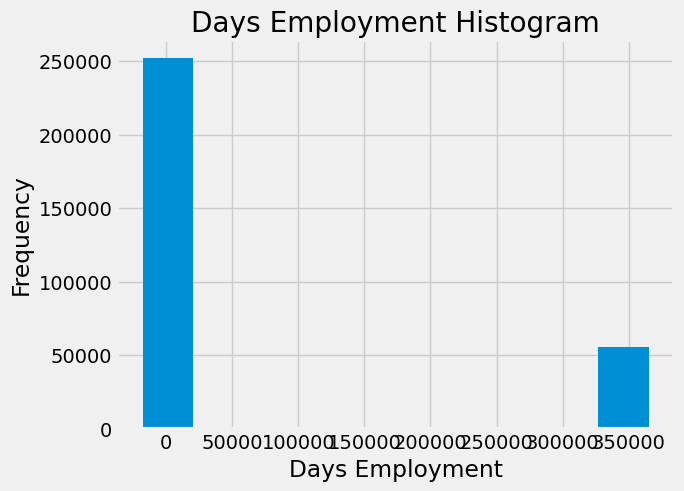

In [233]:
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')
plt.show()

Berdasarkan hasil tersebut, kita coba untuk menggali informasi lebih lanjut terkait dengan klien anomali ini untuk melihat kecenderungan tingkat gagal bayar yang lebih tinggi atau rendah dibanding klien lainnya

In [234]:
anom = df_train[df_train['DAYS_EMPLOYED'] == 365243]
non_anom = df_train[df_train['DAYS_EMPLOYED'] != 365243]

print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Hasilnya menyatakan bahwa variabel anomali berdasarkan 'DAYS_EMPLOYED' memiliki tingkat gagal bayar yang lebih rendah, sehingga akan dilakukan penanganan dengan:
- mengisi nilai anomali tersebut dengan bukan angka
- membuat kolom boolean baru yang menandakan apakah nilai ini anomali atau bukan

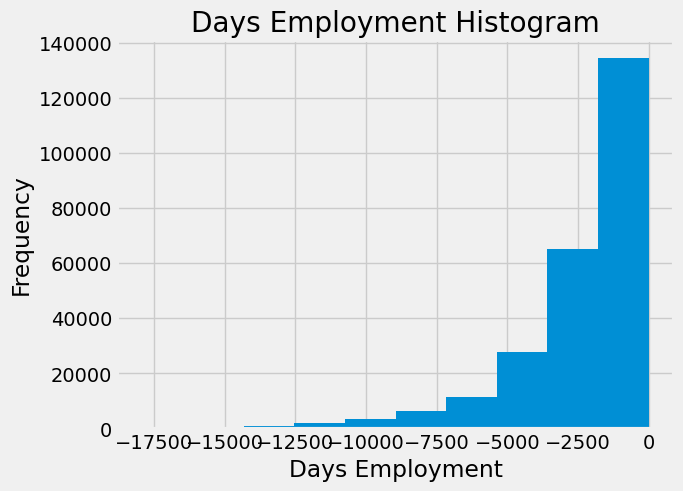

In [235]:
df_train['DAYS_EMPLOYED_ANOM'] = df_train['DAYS_EMPLOYED'] == 365243
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')
plt.show()

Distribusi data setelah melakukan aksi yang disarankan terlihat lebih sesuai. Mari terapkan hal serupa untuk df_test

In [236]:
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('There are %d anomalies in the test data out of %d entries' % (df_test["DAYS_EMPLOYED_ANOM"].sum(), len(df_test)))

There are 9274 anomalies in the test data out of 48744 entries


/tmp/ipython-input-2190053636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)


### Find Correlations

Tim telah menetapkan kategori ukuran korelasi antar kolom data sebagai berikut :
- .00 - .19 "very weak"
- .20 - .39 "weak"
- .40 - .59 "moderate"
- .60 - .79 "strong"
- .80 - 1.00 "very strong

In [237]:
corr = df_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(15))
print('\nMost Negative Correlations:\n', corr.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Berdasarkan paparan hasil perhitungan korelasi kolom terhadap kolom 'TARGET' :
- 'DAYS_BIRTH' merupakan korelasi paling positf (namun lemah). Kolom ini berarti usia klien dalam hari saat pinjaman dalam nilai negatif. - Korelasi dari kolom ini positif namun nilainya negatif, sehingga bermakna bahwa seiring bertambahnya usia klien, kecenderungan gagal bayar lebih sedikit.
- Ini sedikit membingungkan, sehingga perlu mengambil nilai absolut dari kolom tersebut dan korelasinya akan negatif

#### Effect of Age on Repayment

In [238]:
# Find the correlation of the positive days since birth and target
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])

np.float64(-0.07823930830982694)

Setelah perubahan nilai menjadi absolut, hubungan linear 'DAYS_BIRTH' dengan 'TARGET' menyatakan kecenderungan lebih sering membayar tepat waktu

Dari variable tersebut, kita mencoba untuk melihat histogram dari kolom 'DAYS_BIRTH' dengan membaginya ke 365 (untuk melihat penyebaran datanya dalam bentuk tahun) agar bisa lebih mengerti tentang data tersebut

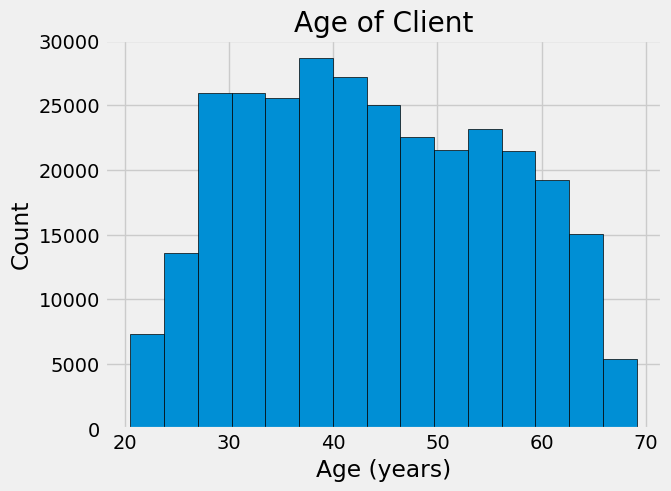

In [239]:
plt.style.use('fivethirtyeight')

plt.hist(df_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 15)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

Dari hasil visualisasi histogram ini, tidak terdapat informasi baru selain tidak adanya outlier pada kolom tersebut.

Untuk melihat lebih jauh pengaruh usia pada target, akan dibuat KDE (Kernel Density Estimation) Plot untuk menunjukkan distribusi satu variable dan dianggap sebagai smoothed histogram

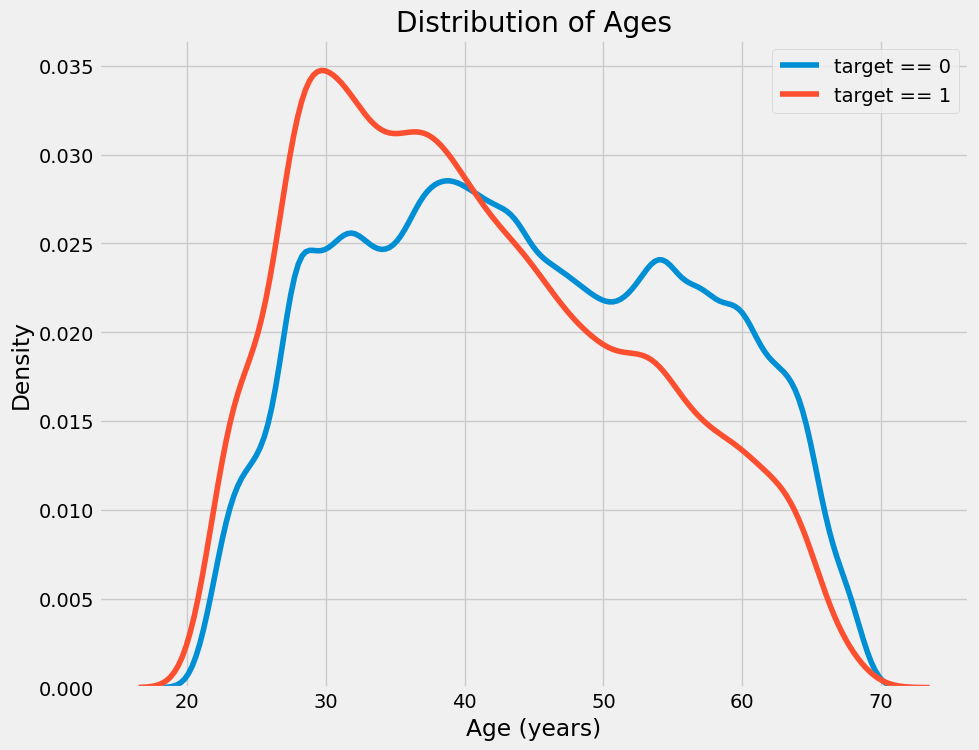

In [240]:
plt.figure(figsize = (10,8))

sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend()
plt.show()

Beberapa poin yang bisa diperoleh dari KDE plot ini :
- Kurva target == 1 condong ke ujung rentang yang lebih muda
- Berdasarkan korelasi sebelumnya, 'DAYS_BIRTH' bukan korelasi yang signifikan (-0.07), namun kemungkinan akan berguna dalam pemodelan karena bisa memengaruhi target

Kita coba eksplorasi lebih lanjut terkait hubungan ini dengan melihat rata-rata kegagalan pembayaran pinjaman menurut kelompok usia yang dilakukan dengan cara:
- Memotong kategori usia per 5 tahun
- Menghitung rata-rata target, untuk memberitahu rasio pinjaman yang tidak dilunasi dalam setiap kelompok usia

In [241]:
# Make Variable that contain age information dataframe
age_data = df_train.loc[:, ['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [242]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

/tmp/ipython-input-1757995694.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups  = age_data.groupby('YEARS_BINNED').mean()


,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


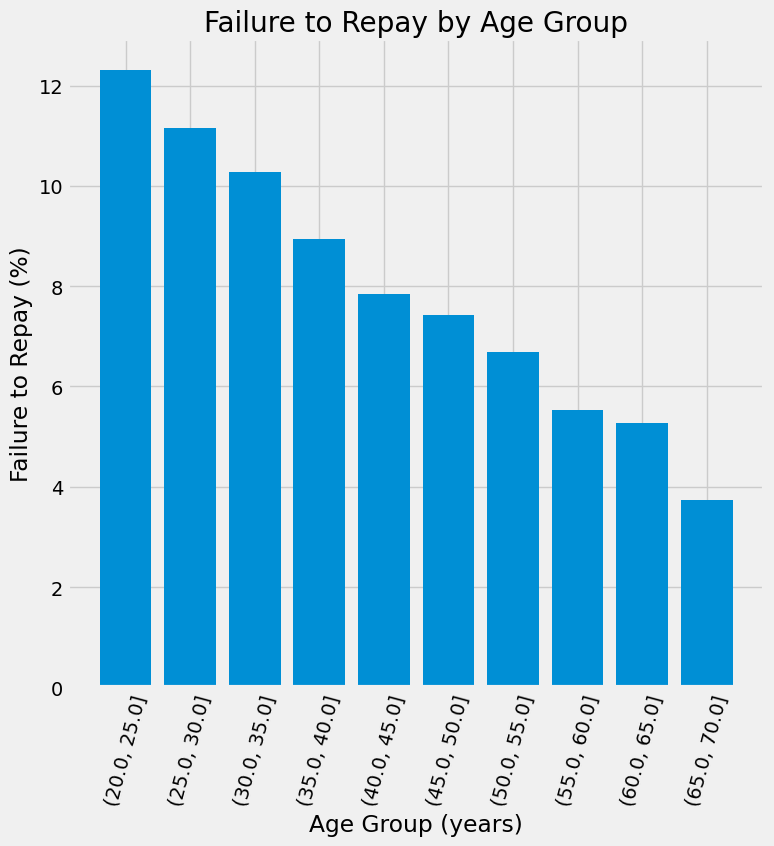

In [243]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')
plt.show()

Dari visualisasi ini, terdapat tren yang jelas, yaitu:
- Klien yang lebih muda cenderung tidak membayar kembali pinjaman dengan tingkat kegagalan membayar kembali diatas 10% untuk 3 kelompok usia termuda
- Untuk 3 kelompok usia tertua, itu berada di bawah 5%

Sehingga dengan kesimpulan tersebut, perusahaan harus memberikan lebih banyak panduan atau giat perencanaan keuangan.

### Handling Strongest Negative Correlations

Terdapat 3 variable tertinggi yang berkorelasi negatif dengan variable 'TARGET', yaitu:
- EXT_SOURCE_1
- EXT_SOURCE_2
- EXT_SOURCE_3

In [244]:
ext_data = df_train.loc[:, ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


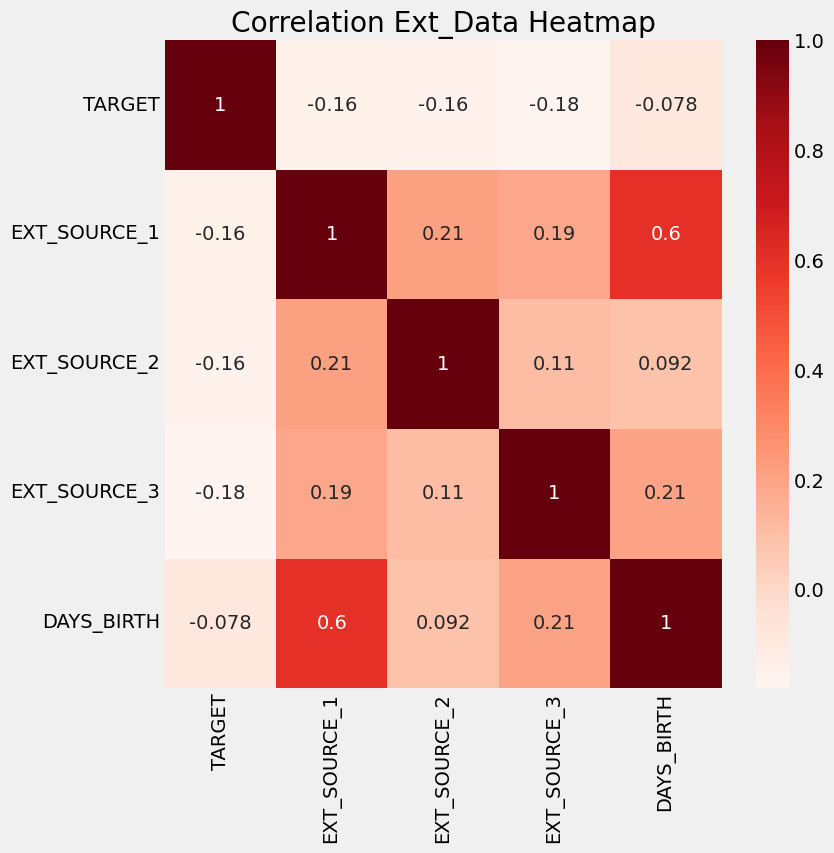

In [245]:
plt.figure(figsize = (8, 8))
sns.heatmap(ext_data_corrs, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Ext_Data Heatmap')
plt.show()

Hasil heatmap menunjukkan bahwa:
- Ketiga fitur EXT_SOURCE berkorelasi negatif dengan 'TARGET' yang menandakan seiring meningkatnya nilai EXT_SOURCE, klien cenderung membayar kembali pinjamannya
- DAYS_BIRTH berkorelasi positif dengan EXT_SOURCE_1 yang menunjukkan bahwa mungkin salah satu faktor dalam skor ini adalah usia klien

In [246]:
## Fungsi menampilkan KDE Plot
def kde_plot_dist(df, list_col, num_subplots = 3):
    plt.figure(figsize = (10, 12))

    for i, source in enumerate(list_col):
        # Create new subplot
        plt.subplot(num_subplots,1,i+1)

        sns.kdeplot(df.loc[df['TARGET'] == 0, source], label = 'target == 0')
        sns.kdeplot(df.loc[df['TARGET'] == 1, source], label = 'target == 1')

        plt.title('Distribution of %s by Target Value' % source)
        plt.xlabel('%s' % source)
        plt.ylabel('Density')
        plt.legend()

    plt.tight_layout(h_pad = 2.5)
    plt.show()

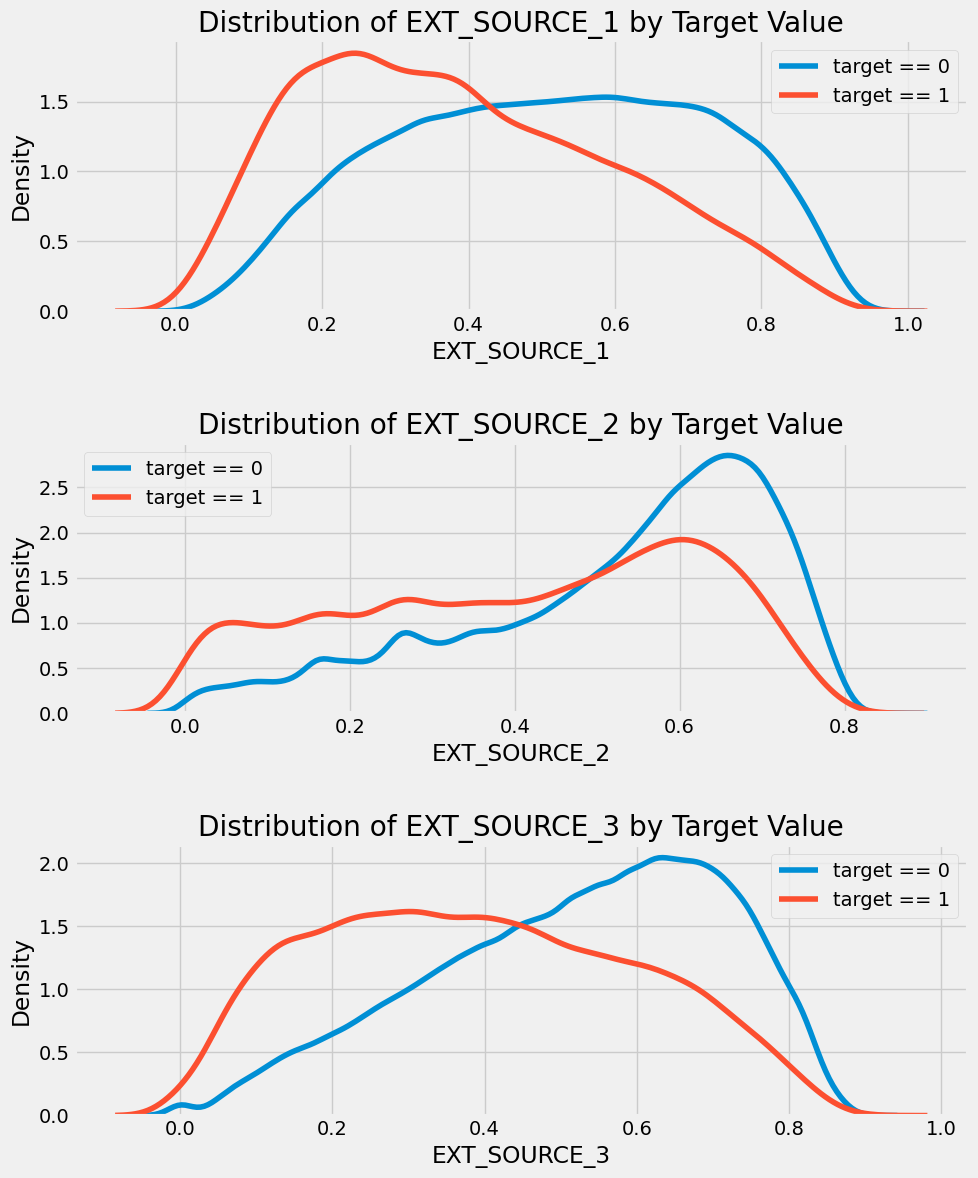

In [247]:
kde_plot_dist(df_train, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])

Hasil KDE Plot pada fitur EXT_SOURCE memperlihatkan bahwa EXT_SOURCE_3 menampilkan perbedaan terbesar antara nilai target.Dapat terlihat dengan jelas bahwa fitur ini memiliki beberapa hubungan dengan kemungkinan pemohon membayar kembali pinjaman meskipun hubungannya tidak terlalu kuat.

### Feature Engineering

#### Domain Knowledge Features

Metode ini membuat kita mencoba untuk menangkap secara mandiri fitur pada data yang menurut kita penting untuk memberi tahu apakah klien akan gagal membayar pinjaman.

Terdapat 4 fitur baru yang dapat dibuat pada df_train yang dapat digunakan menurut skrip yang dikemukakan oleh Aguiar, yaitu:
- CREDIT_INCOME_PERCENT: persentase jumlah kredit relatif terhadap pendapatan klien
- ANNUITY_INCOME_PERCENT: persentase anuitas pinjaman relatif terhadap pendapatan klien
- CREDIT_TERM: jangka waktu pembayaran dalam bulan (karena anuitas adalah jumlah yang harus dibayarkan setiap bulan)
- DAYS_EMPLOYED_PERCENT: persentase hari kerja relatif terhadap usia klien

In [248]:
df_train_domain = df_train.copy()
df_test_domain = df_test.copy()

df_train_domain['CREDIT_INCOME_PERCENT'] = df_train_domain['AMT_CREDIT'] / df_train_domain['AMT_INCOME_TOTAL']
df_train_domain['ANNUITY_INCOME_PERCENT'] = df_train_domain['AMT_ANNUITY'] / df_train_domain['AMT_INCOME_TOTAL']
df_train_domain['CREDIT_TERM'] = df_train_domain['AMT_ANNUITY'] / df_train_domain['AMT_CREDIT']
df_train_domain['DAYS_EMPLOYED_PERCENT'] = df_train_domain['DAYS_EMPLOYED'] / df_train_domain['DAYS_BIRTH']

df_test_domain['CREDIT_INCOME_PERCENT'] = df_test_domain['AMT_CREDIT'] / df_test_domain['AMT_INCOME_TOTAL']
df_test_domain['ANNUITY_INCOME_PERCENT'] = df_test_domain['AMT_ANNUITY'] / df_test_domain['AMT_INCOME_TOTAL']
df_test_domain['CREDIT_TERM'] = df_test_domain['AMT_ANNUITY'] / df_test_domain['AMT_CREDIT']
df_test_domain['DAYS_EMPLOYED_PERCENT'] = df_test_domain['DAYS_EMPLOYED'] / df_test_domain['DAYS_BIRTH']

Visualisasi hasil variabel baru dari metode domain knowledge  

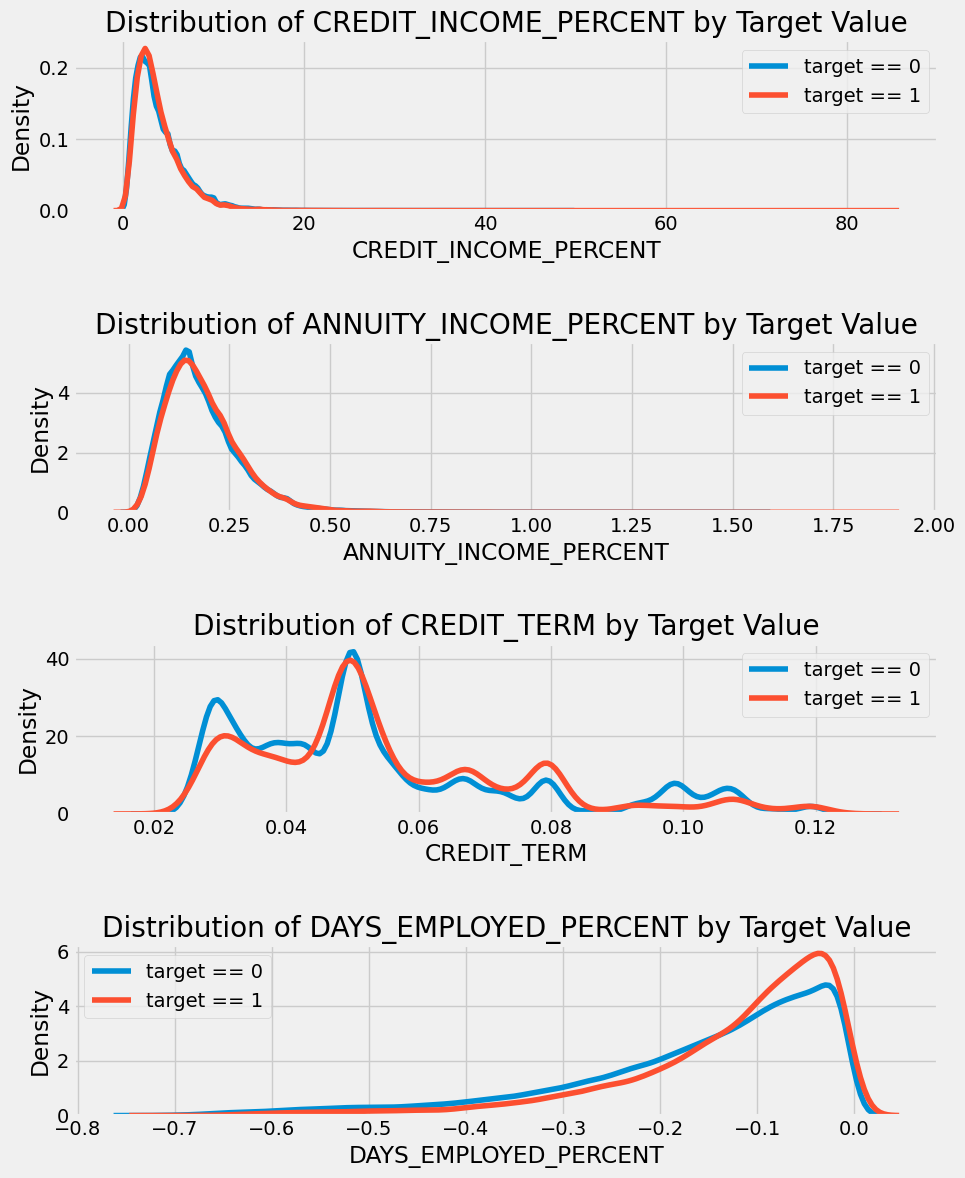

In [249]:
kde_plot_dist(df_train_domain, ['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT'], 4)

Masih sulit untuk melihat fitur-fitur ini akan berguna atau tidak. Cara yang bisa dilakukan untuk sekarang yaitu menerapkannya pada model.

### Modelling Process

In [250]:
X = df_train.drop(['TARGET'], axis = 1)
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

features = list(X.columns)

test = df_test.copy()

# Imputation for missing values
imputer = SimpleImputer(strategy = 'median')
scaler = MinMaxScaler(feature_range=(0, 1))

imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Normalization
scaler.fit(X_train)
train = scaler.transform(X_train)
test = scaler.transform(X_test)

print('Train data shape: ', train.shape)
print('Train labels shape: ', test.shape)

Train data shape:  (230633, 240)
Train labels shape:  (76878, 240)


In [251]:
# Modelling using Logistic Regression
log_reg = LogisticRegression(C=0.0001)
log_reg.fit(train, y_train)

log_reg_pred = log_reg.predict_proba(test)[:, 1]
print(roc_auc_score(y_test, log_reg_pred))

0.6881772682549427


### Using Random Forest Model

In [252]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
random_forest.fit(train, y_train)

feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.3s finished


In [253]:
print(roc_auc_score(y_test, predictions))

0.7100178473849114


### Make Prediction using Engineered Features

#### Using Domain Knowledge Features

In [254]:
train_domain = df_train_domain.drop(columns = 'TARGET')
test_domain = df_train_domain['TARGET']

X_train, X_test, y_train, y_test = train_test_split(train_domain, test_domain, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(X_test.shape)

domain_features_names = list(train_domain.columns)

# Impute the domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(X_train)
domain_features_test = imputer.fit_transform(X_test)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.fit_transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, y_train)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

(230633, 244)
(76878, 244)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.8s finished


In [255]:
print(roc_auc_score(y_test, predictions))

0.7011015037166093


### Model Interpretation: Feature Importances

In [256]:
def plot_feature_importances(df):
    df = df.sort_values('importance', ascending = False).reset_index()
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k')

    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    plt.xlabel('Normalized Importance')
    plt.title('Feature Importances')
    plt.show()

    return df

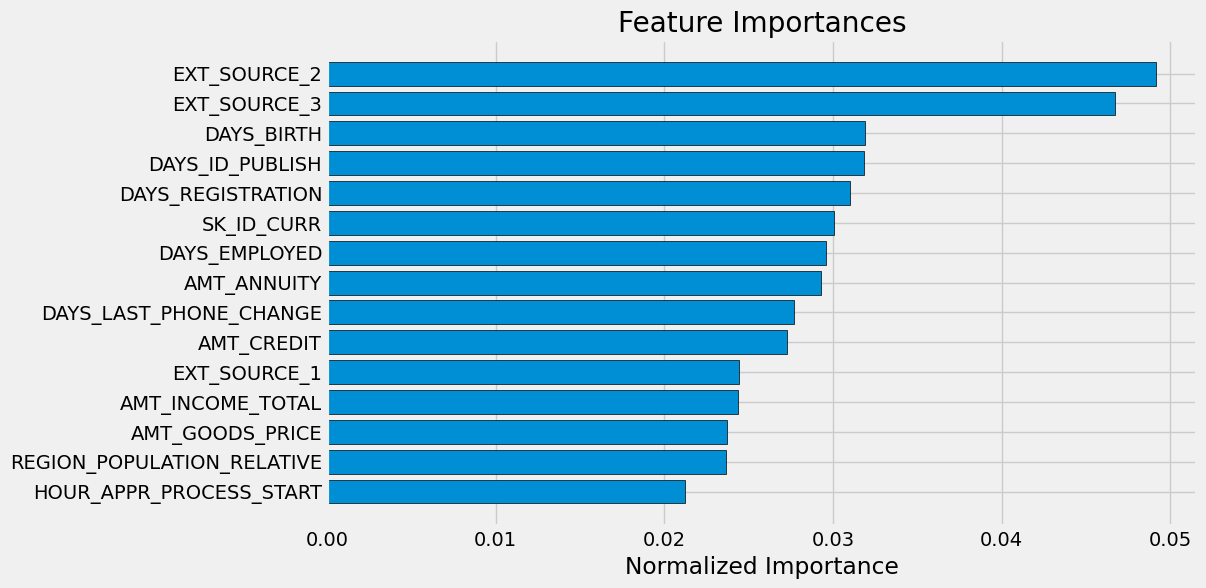

In [257]:
feature_importances_sorted = plot_feature_importances(feature_importances)

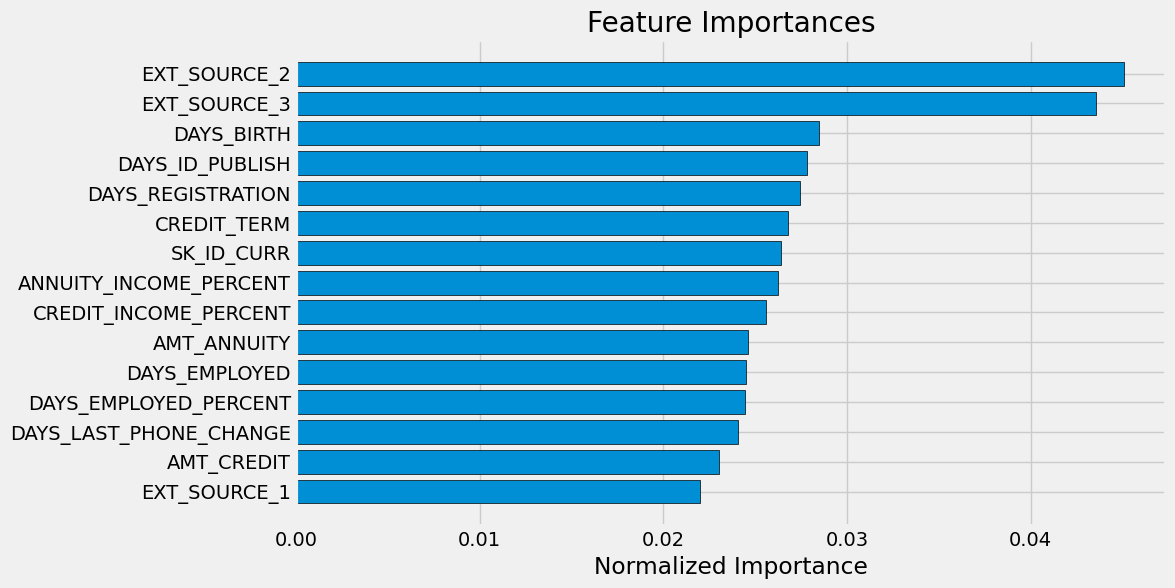

In [258]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

Hasil dari visualisasi diatas menunjukkan bahwa variabel EXT_SOURCE_2, EXT_SOURCE_3, dan DAYS_BIRTH menjadi fitur yang cukup berpengaruh dalam pengambilan keputusan prediksi.

Selain itu, hanya terdapat beberapa fitur lainnya yang memiliki efek signifikan terhadap pemodelan, sehingga mungkin diperlukan tindakan menghapus lebih banyak variabel yang tidak memberi efek signifikan terhadap hasil keputusan prediksi akhir.

### Conclusions

Beberapa alur utama dilakukan dalam proses mencapai tujuan bisnis untuk mengklasifikasikan seseorang memiliki hak untuk menerima pinjaman atau tidak, yaitu:

1. Business & Data Understanding
2. Data Cleaning & Formatting
3. EDA (Exploratory Data Analysis)
4. Feature Engineering
5. Modelling Process
6. Model Interpretation